# LOAN INTEREST RATE PREDICTION

Step 1 : Data Exploration

Step 2 : Data Preprocessing

Step 3 : Data Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Step 1 : Data Exploration

In [2]:
# import training data
train = pd.read_csv("Train.csv", low_memory=False)

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [5]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [6]:
train.shape

(164309, 14)

In [7]:
train.corr()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
Loan_ID,1.000000,0.008326,-0.001320,0.002593,0.002111,0.004626,0.005331,0.001290
Annual_Income,0.008326,1.000000,-0.173589,0.060011,-0.057804,0.145822,0.203237,-0.052783
Debt_To_Income,-0.001320,-0.173589,1.000000,-0.005142,0.006394,0.302442,0.229871,0.152472
Inquiries_Last_6Mo,0.002593,0.060011,-0.005142,1.000000,0.011971,0.100930,0.131467,0.188987
Months_Since_Deliquency,0.002111,-0.057804,0.006394,0.011971,1.000000,-0.049683,-0.062261,-0.042108
Number_Open_Accounts,0.004626,0.145822,0.302442,0.100930,-0.049683,1.000000,0.682137,0.002847
Total_Accounts,0.005331,0.203237,0.229871,0.131467,-0.062261,0.682137,1.000000,-0.040690
Interest_Rate,0.001290,-0.052783,0.152472,0.188987,-0.042108,0.002847,-0.040690,1.000000


In [8]:
train.corr()['Interest_Rate'][:]

Loan_ID                    0.001290
Annual_Income             -0.052783
Debt_To_Income             0.152472
Inquiries_Last_6Mo         0.188987
Months_Since_Deliquency   -0.042108
Number_Open_Accounts       0.002847
Total_Accounts            -0.040690
Interest_Rate              1.000000
Name: Interest_Rate, dtype: float64

In [9]:
train['Income_Verified'].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [10]:
train['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [11]:
train['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [12]:
train['Gender'].value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

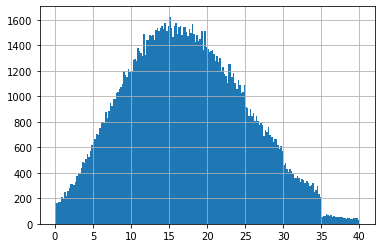

In [13]:
%matplotlib inline
train['Debt_To_Income'].hist(bins=200);

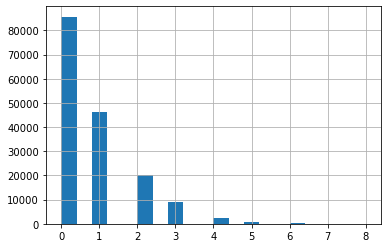

In [14]:
%matplotlib inline
train['Inquiries_Last_6Mo'].hist(bins=20);

<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

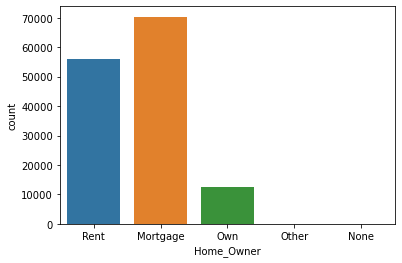

In [15]:
sn.countplot(x=train['Home_Owner'])

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

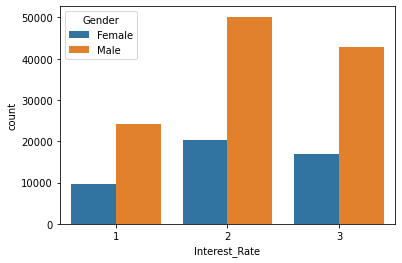

In [16]:
#int rate wrt gender
sn.countplot(x=train['Interest_Rate'],hue=train['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

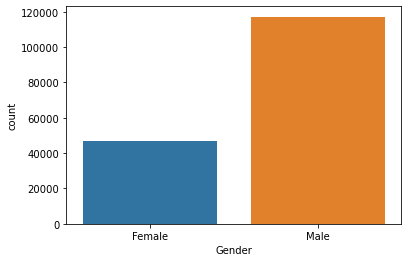

In [17]:
sn.countplot(x=train['Gender'])

<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

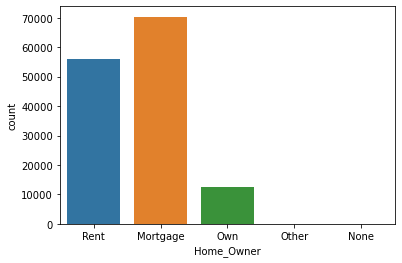

In [18]:
sn.countplot(x=train['Home_Owner'])

<AxesSubplot:xlabel='Income_Verified', ylabel='count'>

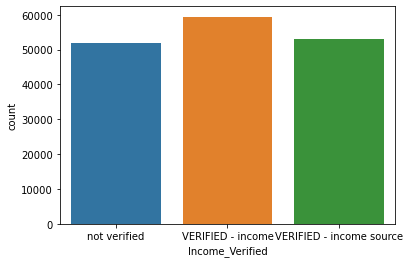

In [19]:
sn.countplot(x=train['Income_Verified'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'other'),
  Text(6, 0, 'medical'),
  Text(7, 0, 'small_business'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'wedding'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

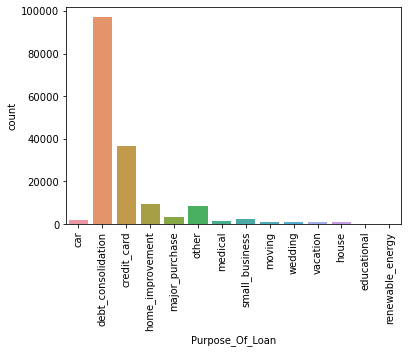

In [20]:
sn.countplot(x=train['Purpose_Of_Loan'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Gender', ylabel='count'>

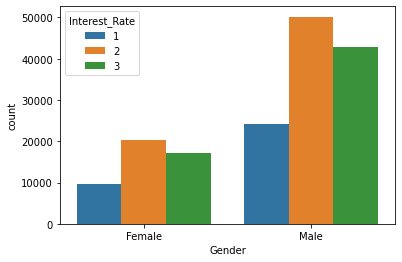

In [21]:
#  gender wrt int rate
sn.countplot(x=train['Gender'],hue=train['Interest_Rate'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '4 years'),
  Text(2, 0, '7 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '2 years'),
  Text(5, 0, '10+ years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '9 years'),
  Text(9, 0, '3 years'),
  Text(10, 0, '5 years')])

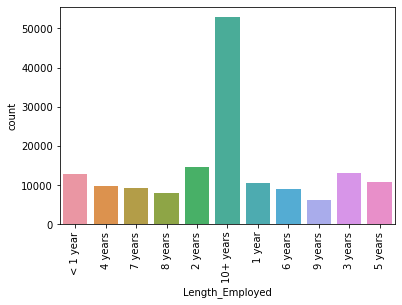

In [22]:
#Length_Employed data check view
sn.countplot(x=train['Length_Employed'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '4 years'),
  Text(2, 0, '7 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '2 years'),
  Text(5, 0, '10+ years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '9 years'),
  Text(9, 0, '3 years'),
  Text(10, 0, '5 years')])

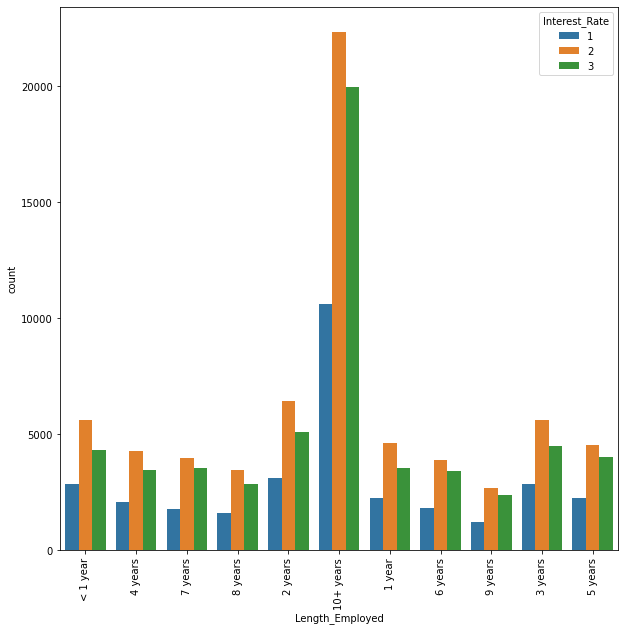

In [23]:
#Interest rate wrt Length_Employed data check view
plt.figure(figsize=(10,10))
sn.countplot(x=train['Length_Employed'],hue=train['Interest_Rate'])
plt.xticks(rotation=90)

# Step 2 : Data Preprocessing

In [24]:
#LoanID column gives no predictive value as a feature, so we will drop it
train.drop(['Loan_ID'],axis=1,inplace=True)

In [25]:
#Changing datatype:
train["Loan_Amount_Requested"] = train["Loan_Amount_Requested"].str.replace(",","").astype(float)

In [26]:
train['Loan_Amount_Requested'].dtype

dtype('float64')

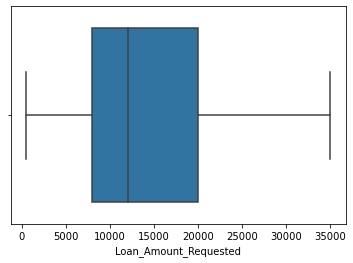

In [27]:
try:
    sn.boxplot(train['Loan_Amount_Requested'])
except TypeError:
    print("Looks like data type is not numeric ")

In [28]:
train['Loan_Amount_Requested'].describe()

count    164309.00000
mean      14349.33692
std        8281.86870
min         500.00000
25%        8000.00000
50%       12075.00000
75%       20000.00000
max       35000.00000
Name: Loan_Amount_Requested, dtype: float64

In [29]:
train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000.0,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000.0,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Density'>

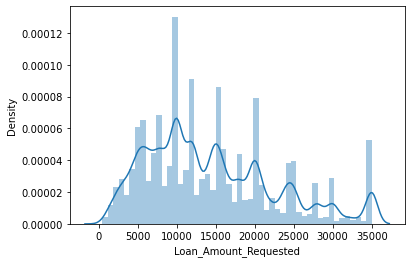

In [30]:
sn.distplot(train['Loan_Amount_Requested'])

<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

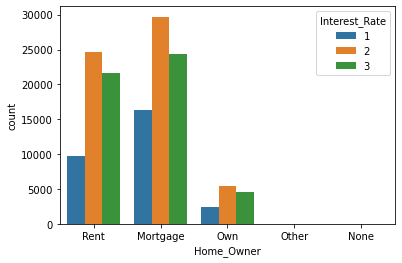

In [31]:
#Length_Employed
sn.countplot(train['Home_Owner'],hue=train['Interest_Rate'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '4 years'),
  Text(2, 0, '7 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '2 years'),
  Text(5, 0, '10+ years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '9 years'),
  Text(9, 0, '3 years'),
  Text(10, 0, '5 years')])

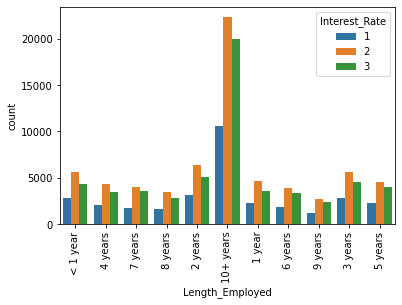

In [32]:
sn.countplot(x=train['Length_Employed'],hue=train['Interest_Rate'])
plt.xticks(rotation=90)

Till now it is clear that mostly the people who have mortgage or rent has more loan needs \nMostly Male Customers Mostly 10+ Years work experience applied for loansAs years of experience increases we can observe in rise of mortgages

In [33]:
train.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [34]:
#Checking the wierd values of loan amount=500,definelty outlier(mostly incorrectly added)
train[train['Loan_Amount_Requested']==500]

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
40073,500.0,< 1 year,Rent,18000.00,not verified,other,4.27,0,0.0,4,4,Male,1
67071,500.0,< 1 year,Mortgage,7904.04,not verified,vacation,3.04,2,8.0,3,6,Female,2
94119,500.0,3 years,Mortgage,26000.00,not verified,small_business,14.17,0,38.0,8,28,Male,2


Next Items Data Cleaning (NULL handling) Conversion of data types Outlier detection categorical values handling

Next will focus on Loan_Amount_Requested , experience looks corelated with loan category

###### Feature Enginnering :
Length_Employed


We wil convert the loan into numbers with below assumtions

Less than 1 year = 0.8 year assuming very rarely freshers applies for loan within 6 months after joining 10 or 10+ as 10 years 

So we will have in numbers 0.8 ,1,2,3,4,5,6,7,8,9,10

In [35]:
train['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

##### Checking central tendency value to replace numeric missing values, Will Try mean median

In [36]:
#Median
train[train['Length_Employed'].isnull()].median(axis=0,skipna=True)

Loan_Amount_Requested      10000.00
Length_Employed                 NaN
Annual_Income              44200.00
Debt_To_Income                18.14
Inquiries_Last_6Mo             0.00
Months_Since_Deliquency       34.00
Number_Open_Accounts           9.00
Total_Accounts                22.00
Interest_Rate                  2.00
dtype: float64

In [37]:
#Mean
train[train['Length_Employed'].isnull()].mean(axis=0,skipna=True)

Loan_Amount_Requested      11493.108126
Length_Employed                     NaN
Annual_Income              49508.856911
Debt_To_Income                18.357059
Inquiries_Last_6Mo             0.730973
Months_Since_Deliquency       36.723086
Number_Open_Accounts          10.028626
Total_Accounts                23.988197
Interest_Rate                  2.187356
dtype: float64

In [38]:
#Checking whats the average income for emp exp
train.groupby(train['Length_Employed']).agg({'Annual_Income': ['mean','median', 'min', 'max']})

Annual_Income                             
                         mean   median      min        max
Length_Employed                                           
1 year           69486.857814  60000.0   4800.0   897000.0
10+ years        80509.442067  70000.0   8520.0  7500000.0
2 years          70832.590654  60000.0   7500.0  1950000.0
3 years          72395.394749  60000.0   6400.0  3900000.0
4 years          71150.557520  60000.0   9000.0  1600000.0
5 years          71704.917747  60000.0   8025.0  1900000.0
6 years          72043.155295  61360.0  10000.0  1200000.0
7 years          72690.152705  62000.0   8500.0   831000.0
8 years          74645.174631  63000.0  10000.0  4900000.0
9 years          73860.317171  64000.0   9732.0   850000.0
< 1 year         67694.486632  56000.0   4000.0  1000000.0

In [39]:
#Checking whats the average income for emp exp
train.groupby(train['Length_Employed']).agg({'Loan_Amount_Requested': ['mean','median', 'min', 'max']})

Loan_Amount_Requested                          
                                 mean   median     min      max
Length_Employed                                                
1 year                   13242.355114  11500.0   725.0  35000.0
10+ years                15800.171974  15000.0  1000.0  35000.0
2 years                  13592.093023  12000.0   800.0  35000.0
3 years                  13699.460459  12000.0   500.0  35000.0
4 years                  13733.130621  12000.0   900.0  35000.0
5 years                  13850.906233  12000.0  1000.0  35000.0
6 years                  14103.216406  12000.0  1000.0  35000.0
7 years                  14439.637946  12762.5  1000.0  35000.0
8 years                  14517.361374  12975.0  1000.0  35000.0
9 years                  14850.688146  13475.0  1000.0  35000.0
< 1 year                 13073.049590  11200.0   500.0  35000.0

In [40]:
train[train['Length_Employed'].isnull()]

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
23,9050.0,NaN,Mortgage,46500.00,VERIFIED - income,debt_consolidation,30.43,0,33.0,8,26,Male,3
43,1500.0,NaN,Rent,20067.00,not verified,medical,24.40,2,62.0,5,17,Male,3
67,9750.0,NaN,Rent,23164.00,VERIFIED - income,credit_card,16.06,1,NaN,3,6,Male,2
69,4500.0,NaN,Rent,29000.00,VERIFIED - income,credit_card,10.34,0,NaN,6,10,Male,2
88,7000.0,NaN,Mortgage,42000.00,VERIFIED - income source,major_purchase,30.11,2,NaN,8,20,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164268,19750.0,NaN,Own,33664.44,VERIFIED - income,credit_card,17.40,0,NaN,8,12,Female,2
164272,10000.0,NaN,Own,28721.40,VERIFIED - income,debt_consolidation,33.42,1,73.0,14,16,Male,2
164289,8000.0,NaN,Rent,NaN,VERIFIED - income source,debt_consolidation,21.08,3,NaN,6,19,Male,1
164294,13700.0,NaN,Mortgage,55000.00,VERIFIED - income,debt_consolidation,32.92,0,NaN,15,38,Male,2


In [41]:
#Converting the length of employment to number
Length_Employed=[]
for row in train['Length_Employed']:
    if row=='< 1 year':
        Length_Employed.append(0.8)
    elif row=='1 year':
        Length_Employed.append(1)
    elif row=='2 years':
        Length_Employed.append(2)
    elif row=='3 years':
        Length_Employed.append(3)
    elif row=='4 years':
        Length_Employed.append(4)
    elif row=='5 years':
        Length_Employed.append(5)
    elif row=='6 years':
        Length_Employed.append(6)
    elif row=='7 years':
        Length_Employed.append(7)
    elif row=='8 years':
        Length_Employed.append(8)
    elif row=='9 years':
        Length_Employed.append(9)
    elif row=='10+ years':
        Length_Employed.append(10)
    else:
        Length_Employed.append(0.8) 
'''As visble from above agregate analysis check that the missing employment is hinting for experience lesser than 1 year
e.g. overall median income for less than 1 year is 56000 & for blank exp it is 44200, this is the  nearest to all the values '''

'As visble from above agregate analysis check that the missing employment is hinting for experience lesser than 1 year\ne.g. overall median income for less than 1 year is 56000 & for blank exp it is 44200, this is the  nearest to all the values '

In [42]:
len(Length_Employed)

164309

In [43]:
train['Length_Employed']=pd.Series(Length_Employed)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  float64
 1   Length_Employed          164309 non-null  float64
 2   Home_Owner               138960 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


In [136]:
train.head()

,Interest_Rate,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,1,0.8,7000.0,68000.0,18.37,0,34.0,9,14,0,...,0,0,0,0,0,0,0,0,1,0
1,3,4.0,30000.0,60000.0,14.93,0,17.0,12,24,1,...,0,0,0,0,0,0,0,0,1,0
2,3,7.0,24725.0,75566.4,15.88,0,30.0,12,16,1,...,0,0,0,0,0,0,0,0,0,1
3,3,0.8,16000.0,56160.0,14.34,3,30.0,16,22,0,...,0,0,0,0,0,0,0,0,0,1
4,1,8.0,17000.0,96000.0,22.17,1,34.0,19,30,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Length_Employed', ylabel='Annual_Income'>

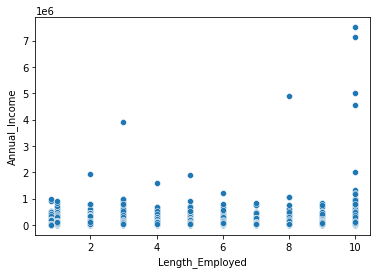

In [46]:
#Checking correaltion between Loan_Amount_Requested & Income
sn.scatterplot(train['Length_Employed'],train['Annual_Income'])


Above shows it increases little bit experience in this given data, might be as our experience scale is discrete

# Home_Owner

In [47]:
train.Home_Owner.unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

To handle the missing value we will use the same aggregate techniques as used earlier for Length Employed

In [48]:
train.groupby('Home_Owner').agg({'Loan_Amount_Requested':['mean','median','min','max']})

Loan_Amount_Requested                          
                            mean   median     min      max
Home_Owner                                                
Mortgage            16040.132206  15000.0   500.0  35000.0
None                 9420.000000  10375.0  2800.0  15000.0
Other               10642.857143  10000.0  1000.0  35000.0
Own                 13567.704591  12000.0   900.0  35000.0
Rent                12443.831986  10625.0   500.0  35000.0

In [49]:
train.groupby('Home_Owner').agg({'Annual_Income':['mean','median','min','max']})

Annual_Income                              
                    mean   median       min        max
Home_Owner                                            
Mortgage    83699.371184  72000.0   7904.04  7500000.0
None        70550.000000  55650.0  22200.00   150000.0
Other       64540.743590  57500.0  11389.00   186000.0
Own         66104.826361  55000.0   4000.00  1200000.0
Rent        62077.534637  54000.0   4000.00  1950000.0

In [50]:
train[train['Home_Owner'].isnull()].median(axis=0)

Loan_Amount_Requested      12000.0
Length_Employed                6.0
Home_Owner                     NaN
Annual_Income              62000.0
Debt_To_Income                16.9
Inquiries_Last_6Mo             0.0
Months_Since_Deliquency       32.0
Number_Open_Accounts          10.0
Total_Accounts                23.0
Interest_Rate                  2.0
dtype: float64

In [51]:
train[train['Home_Owner'].isnull()].mean(axis=0)

Loan_Amount_Requested      14264.489723
Length_Employed                5.834873
Home_Owner                          NaN
Annual_Income              73070.153357
Debt_To_Income                17.265033
Inquiries_Last_6Mo             0.787250
Months_Since_Deliquency       34.465663
Number_Open_Accounts          11.158468
Total_Accounts                24.945087
Interest_Rate                  2.161703
dtype: float64

In [52]:
train['Home_Owner'].fillna('Own',inplace=True)

In [53]:
train['Home_Owner'].isnull().sum()

0

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  float64
 1   Length_Employed          164309 non-null  float64
 2   Home_Owner               164309 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


In [55]:
train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000.0,0.8,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,30000.0,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725.0,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,16000.0,0.8,Own,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,17000.0,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1



Change of thoughts!! Will deal with categorical values in the end, First will finish for missing values

# Annual_Income

In [56]:
train.Annual_Income.isnull().sum()

25102


We will not directly replace the mssing annual income value with a single aggregate , rather we assume that length employed might be a better fill for income , as income for a 10+ years employees will not be comparable to 1 year exp employee (off course there can be outliers) Also in the data looks like some outliers for income so we will chose median instead of mean

In [57]:
Avg_income=train.groupby('Length_Employed')['Annual_Income'].median()

In [58]:
train = train.set_index(['Length_Employed'])

In [59]:
train['Annual_Income'].fillna(Avg_income,inplace=True)

In [60]:
train['Annual_Income'].isnull().sum()

0

In [61]:
train =train.reset_index()

In [134]:
train.head()

,Interest_Rate,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,1,0.8,7000.0,68000.0,18.37,0,34.0,9,14,0,...,0,0,0,0,0,0,0,0,1,0
1,3,4.0,30000.0,60000.0,14.93,0,17.0,12,24,1,...,0,0,0,0,0,0,0,0,1,0
2,3,7.0,24725.0,75566.4,15.88,0,30.0,12,16,1,...,0,0,0,0,0,0,0,0,0,1
3,3,0.8,16000.0,56160.0,14.34,3,30.0,16,22,0,...,0,0,0,0,0,0,0,0,0,1
4,1,8.0,17000.0,96000.0,22.17,1,34.0,19,30,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Length_Employed          164309 non-null  float64
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Home_Owner               164309 non-null  object 
 3   Annual_Income            164309 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


# Months_Since_Deliquency

In [64]:
train['Months_Since_Deliquency'].isnull().sum()

88379

In [65]:
train['Months_Since_Deliquency'].unique()

array([ nan,  17.,  16.,  68.,  13.,   6.,  64.,  10.,  63.,  33.,  22.,
        28.,   8.,  26.,  41.,  46.,  62.,  21.,  12.,  52.,   3.,  65.,
        43.,  53.,  44.,   1.,  11.,  71.,  23.,  15.,  48.,  39.,  30.,
        32.,  18.,  24.,  47.,  66.,  19.,  76.,   4.,  29.,  45.,  38.,
        56.,  37.,  20.,  35.,   2.,   9.,  34.,  14.,  59.,  36.,  50.,
        81.,  72.,  69.,  57.,  25.,   7.,  49.,  31.,  78.,  70.,  27.,
         5.,  51.,  58.,  75.,  42.,  74.,  40.,  67.,  61.,  55.,  77.,
        54.,   0.,  60.,  73.,  79.,  82.,  80.,  83.,  88., 127., 106.,
        99.,  97., 139.,  96., 119., 116.,  94., 141.,  86.,  91.,  84.,
        85.,  95.,  90.,  87., 103., 101., 121., 148.,  93., 122.,  92.,
       180., 105., 110., 129., 130., 135., 114., 102., 111.,  98., 131.,
       107., 170.])

In [66]:
train['Months_Since_Deliquency'].max()

180.0

In [67]:
train['Months_Since_Deliquency'].min()

0.0

In [68]:
len(train['Months_Since_Deliquency'].unique())

123

In [69]:
train.groupby('Interest_Rate')['Months_Since_Deliquency'].mean()

Interest_Rate
1    36.345819
2    34.220648
3    33.434987
Name: Months_Since_Deliquency, dtype: float64

In [70]:
Avg_deliq=train.groupby('Interest_Rate')['Months_Since_Deliquency'].median()

In [71]:
train = train.set_index('Interest_Rate')

In [72]:
train['Months_Since_Deliquency'].fillna(Avg_deliq,inplace=True)

In [73]:
train['Months_Since_Deliquency'].isnull().sum()

0

In [74]:
train=train.reset_index()

In [75]:
train.head()

,Interest_Rate,Length_Employed,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,1,0.8,7000.0,Rent,68000.0,not verified,car,18.37,0,34.0,9,14,Female
1,3,4.0,30000.0,Mortgage,60000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female
2,3,7.0,24725.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,30.0,12,16,Male
3,3,0.8,16000.0,Own,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,30.0,16,22,Male
4,1,8.0,17000.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,34.0,19,30,Female


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Interest_Rate            164309 non-null  int64  
 1   Length_Employed          164309 non-null  float64
 2   Loan_Amount_Requested    164309 non-null  float64
 3   Home_Owner               164309 non-null  object 
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  164309 non-null  float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


In [77]:
train['Income_Verified'].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [78]:
train['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'other'),
  Text(6, 0, 'medical'),
  Text(7, 0, 'small_business'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'wedding'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

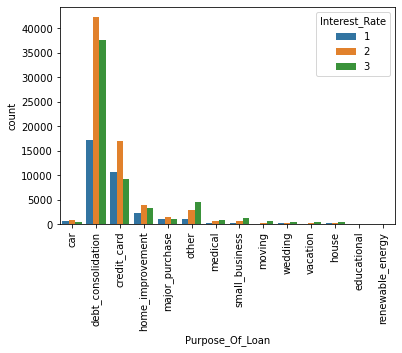

In [79]:
sn.countplot(train['Purpose_Of_Loan'],hue=train['Interest_Rate'])
plt.xticks(rotation=90)

In [80]:
len(train.columns)

13


As total columns is 14 and even if we assign indivual values of the categorical values then also number of features will be below 50. So we can try get_dummies method

In [81]:
train = pd.get_dummies(train)

In [82]:
train.columns

Index(['Interest_Rate', 'Length_Employed', 'Loan_Amount_Requested',
       'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [83]:
train.head()

,Interest_Rate,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,1,0.8,7000.0,68000.0,18.37,0,34.0,9,14,0,...,0,0,0,0,0,0,0,0,1,0
1,3,4.0,30000.0,60000.0,14.93,0,17.0,12,24,1,...,0,0,0,0,0,0,0,0,1,0
2,3,7.0,24725.0,75566.4,15.88,0,30.0,12,16,1,...,0,0,0,0,0,0,0,0,0,1
3,3,0.8,16000.0,56160.0,14.34,3,30.0,16,22,0,...,0,0,0,0,0,0,0,0,0,1
4,1,8.0,17000.0,96000.0,22.17,1,34.0,19,30,0,...,0,0,0,0,0,0,0,0,1,0


In [131]:
train.corr()['Interest_Rate'][:]

Interest_Rate                               1.000000
Length_Employed                             0.025645
Loan_Amount_Requested                       0.132486
Annual_Income                              -0.048099
Debt_To_Income                              0.152472
Inquiries_Last_6Mo                          0.188987
Months_Since_Deliquency                    -0.071054
Number_Open_Accounts                        0.002847
Total_Accounts                             -0.040690
Home_Owner_Mortgage                        -0.054229
Home_Owner_None                            -0.002736
Home_Owner_Other                           -0.001809
Home_Owner_Own                              0.004147
Home_Owner_Rent                             0.053030
Income_Verified_VERIFIED - income           0.174469
Income_Verified_VERIFIED - income source    0.016419
Income_Verified_not verified               -0.196870
Purpose_Of_Loan_car                        -0.040529
Purpose_Of_Loan_credit_card                -0.

In [84]:
#Separating features and value to be predicted
X = train.iloc[:,1:]

In [85]:
#Features
X.head()

,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,0.8,7000.0,68000.0,18.37,0,34.0,9,14,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.0,30000.0,60000.0,14.93,0,17.0,12,24,1,0,...,0,0,0,0,0,0,0,0,1,0
2,7.0,24725.0,75566.4,15.88,0,30.0,12,16,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.8,16000.0,56160.0,14.34,3,30.0,16,22,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.0,17000.0,96000.0,22.17,1,34.0,19,30,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
#Value to be predicted
y=train['Interest_Rate']

In [87]:
y.head()

0    1
1    3
2    3
3    3
4    1
Name: Interest_Rate, dtype: int64

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify = train['Interest_Rate'])

# Step 3 : Data Modelling

As its a classification problem with multiclass, we will try RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
def accuracy(n):
    
    RF_CLF=RandomForestClassifier(n_estimators=n,random_state=42)
    RF_CLF.fit(X_train,y_train)
    y_pred=RF_CLF.predict(X_test)
    print('Accuracy Score for number of estimators: ',n,accuracy_score(y_test,y_pred))
    print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],
    colnames=['Predicted Loan Category']))

accuracy(500)

Accuracy Score for number of estimators:  500 0.7784269571744467
Predicted Loan Category     1      2      3
Actual Loan Category                       
1                        7284   2198    660
2                         853  16965   3356
3                         406   3449  14122


We tried running the code for estimators from 100 to 2500 almost all gave around 77% accuracy , so will go ahead with the 500 estimator to save time

In [91]:
RF_CLF=RandomForestClassifier(n_estimators=100,random_state=42)
RF_CLF.fit(X_train,y_train)
y_pred=RF_CLF.predict(X_test)

In [92]:
print('Accuracy Score for 100 estimators: ',accuracy_score(y_test,y_pred))
print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],
colnames=['Predicted Loan Category']))

Accuracy Score for 100 estimators:  0.7776560566409023
Predicted Loan Category     1      2      3
Actual Loan Category                       
1                        7302   2173    667
2                         899  16978   3297
3                         431   3493  14053


In [93]:
from sklearn.linear_model import SGDClassifier

In [94]:
SGD_CLF=SGDClassifier(max_iter=1000,random_state=42)

In [95]:
SGD_CLF.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [96]:
y_pred_SGD=SGD_CLF.predict(X_test)

In [97]:
print('Accuracy Score for SGDClassifier: ',accuracy_score(y_test,y_pred_SGD))
print(pd.crosstab(y_test,y_pred_SGD,rownames=['Actual Loan Category'],
colnames=['Predicted Loan Category']))

Accuracy Score for SGDClassifier:  0.35958452518613193
Predicted Loan Category     1   2      3
Actual Loan Category                    
1                        1613  21   8508
2                        2791  26  18357
3                        1870  21  16086


# Evaluation

# Cross Validation Kfolds

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
#Random Forest Scores
RN_F_Score=cross_val_score(RandomForestClassifier(n_estimators=100,random_state=42),X,y,cv=5)

In [100]:
#Will try for multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [101]:
#Logistic Regression score
LR_Score=cross_val_score(LogisticRegression(random_state=42),X,y,cv=5)

In [102]:
#Support Vector Machine score
#SVC_Score=cross_val_score(SVC(),X,y,cv=5)

We have commneted the SVM model is because it was running endlessly....We might have to scale the data using StandardScaler to run it faster.

### As of now we will compare Logistic Regression and Random Forest using Cross validation.

In [103]:
print('Average Score for Logistic Regression: ', LR_Score.mean())
print('Average Score for RandomForest Classifier: ', RN_F_Score.mean())

Average Score for Logistic Regression:  0.46175802818470124
Average Score for RandomForest Classifier:  0.7772428829384387


Looks like RandomForest Performed Better!! But yes many imporovement can be done by tunning parameters of other models, we can use GridSearch Options to check for best parameters.

# Final Result

In [104]:
print('CLASSIFICATION REPORT',classification_report(y_test,y_pred))

CLASSIFICATION REPORT               precision    recall  f1-score   support

           1       0.85      0.72      0.78     10142
           2       0.75      0.80      0.77     21174
           3       0.78      0.78      0.78     17977

    accuracy                           0.78     49293
   macro avg       0.79      0.77      0.78     49293
weighted avg       0.78      0.78      0.78     49293



In [105]:
print('Accuracy Score for 100 estimators: ',accuracy_score(y_test,y_pred))
print(pd.crosstab(y_test,y_pred,rownames=['Actual Loan Category'],
colnames=['Predicted Loan Category']))

Accuracy Score for 100 estimators:  0.7776560566409023
Predicted Loan Category     1      2      3
Actual Loan Category                       
1                        7302   2173    667
2                         899  16978   3297
3                         431   3493  14053



Classification Report doesnt look too bad as around 77% we are getting as F1 Score which is a fair enough balance for Precision & Recal, Ofcourse it depends on the business needs about how good is this 77%

#
Bottom Part of the code basiclly using the above random forest classifier was run on a unknown dataset and uploaded to the Hackathon Website.

In [106]:
test = pd.read_csv("test.csv")

In [107]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [108]:
Length_Employed=[]
for row in test['Length_Employed']:
    
    if row=='< 1 year':
        Length_Employed.append(0.8)
    elif row=='1 year':
        Length_Employed.append(1)
    elif row=='2 years':
        Length_Employed.append(2)
    elif row=='3 years':
        Length_Employed.append(3)
    elif row=='4 years':
        Length_Employed.append(4)
    elif row=='5 years':
        Length_Employed.append(5)
    elif row=='6 years':
        Length_Employed.append(6)
    elif row=='7 years':
        Length_Employed.append(7)
    elif row=='8 years':
        Length_Employed.append(8)
    elif row=='9 years':
        Length_Employed.append(9)
    elif row=='10+ years':
        Length_Employed.append(10)
    else:
        Length_Employed.append(0.8)

In [109]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [110]:
test['Length_Employed']=pd.Series(Length_Employed)

In [111]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10.0,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",0.8,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",0.8,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [112]:
test['Home_Owner'].fillna('Own',inplace=True)

In [113]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10.0,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10.0,Own,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",0.8,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10.0,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",0.8,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [114]:
Avg_income=test.groupby('Length_Employed')['Annual_Income'].median()
test=test.set_index(['Length_Employed'])
test['Annual_Income'].fillna(Avg_income,inplace=True)
test['Annual_Income'].isnull().sum()
test = test.reset_index()
###############
#Avg_deliq=Test_data.groupby('Interest_Rate')['Months_Since_Deliquency'].median()
#Test_data=Test_data.set_index('Interest_Rate')
test['Months_Since_Deliquency'].fillna(test['Months_Since_Deliquency'].median(),inplace=True)
#Test_data=Test_data.reset_index()
##############

In [115]:
test.head()

,Length_Employed,Loan_ID,Loan_Amount_Requested,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10.0,10164310,"27,500",Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10.0,10164311,"26,000",Own,110000.0,not verified,credit_card,11.37,0,31.0,6,23,Male
2,0.8,10164312,"6,075",Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,31.0,5,20,Male
3,10.0,10164313,"12,000",Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,31.0,6,8,Male
4,0.8,10164314,"35,000",Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [116]:
test["Loan_Amount_Requested"] = test["Loan_Amount_Requested"].str.replace(",","").astype(float)

In [117]:
test=pd.get_dummies(test)

In [118]:
test.columns

Index(['Length_Employed', 'Loan_ID', 'Loan_Amount_Requested', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [119]:
result= test.copy()

In [120]:
result.drop(['Loan_ID'],axis=1,inplace=True)

In [121]:
result.head()

,Length_Employed,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,10.0,27500.0,129000.0,12.87,0,68.0,10,37,1,0,...,0,0,0,0,0,0,0,0,0,1
1,10.0,26000.0,110000.0,11.37,0,31.0,6,23,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.8,6075.0,75000.0,6.83,2,31.0,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10.0,12000.0,73000.0,7.76,0,31.0,6,8,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.8,35000.0,156000.0,9.62,0,26.0,9,21,1,0,...,0,0,0,0,0,0,0,0,0,1


In [122]:
y_predResult = RF_CLF.predict(result)

In [123]:
type(y_predResult)

numpy.ndarray

In [124]:
y_predResult=pd.Series(y_predResult, name='Interest_Rate')

In [125]:
y_predResult.head()

0    1
1    2
2    2
3    2
4    3
Name: Interest_Rate, dtype: int64

In [126]:
y_predResult = pd.concat([test['Loan_ID'],y_predResult],axis=1)

In [127]:
y_predResult.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,2
2,10164312,2
3,10164313,2
4,10164314,3


In [130]:
y_predResult.to_csv('LoanInterestRatePrediction.xlsx',index=False)

In [129]:
result.to_csv('ResultLIRP.xlsx',index=False)